In [14]:
# Import necessary libraries
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path for importing custom modules
sys.path.append('../src')

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

# Custom modules
from data_fetcher import PortfolioDataFetcher
from data_preprocessor import DataPreprocessor
from eda_analyzer import EDAAnalyzer
from risk_analyzer import RiskAnalyzer

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")
print(f"Analysis started at: {datetime.now()}")


Libraries imported successfully!
Analysis started at: 2025-08-09 23:14:34.649823


In [15]:
# Initialize data fetcher
print("=== PORTFOLIO DATA FETCHING ===")
fetcher = PortfolioDataFetcher(start_date="2015-07-01", end_date="2025-07-31")

# Fetch data for all assets
print("Fetching historical data for TSLA, BND, and SPY...")
raw_data = fetcher.fetch_all_assets()

if raw_data:
    print(f"\n✅ Successfully fetched data for {len(raw_data)} assets")
    
    # Display summary statistics
    summary = fetcher.get_data_summary()
    
    print("\n=== DATA SUMMARY ===")
    for symbol, stats in summary.items():
        print(f"\n📊 {symbol}: {stats['description']}")
        print(f"   📅 Records: {stats['records']:,}")
        print(f"   📆 Date Range: {stats['date_range']}")
        print(f"   💰 Avg Close Price: ${stats['avg_close']:,.2f}")
        print(f"   📈 Avg Daily Return: {stats['avg_daily_return']:.3f}%")
        print(f"   📊 Avg Volatility: {stats['avg_volatility']:.2f}%")
        print(f"   📦 Avg Volume: {stats['avg_volume']:,.0f}")
else:
    print("❌ Failed to fetch data!")


INFO:data_fetcher:Fetching data for TSLA...
INFO:data_fetcher:Successfully fetched 2535 records for TSLA
INFO:data_fetcher:Fetching data for BND...
INFO:data_fetcher:Successfully fetched 2535 records for BND
INFO:data_fetcher:Fetching data for SPY...
INFO:data_fetcher:Successfully fetched 2535 records for SPY


=== PORTFOLIO DATA FETCHING ===
Fetching historical data for TSLA, BND, and SPY...

✅ Successfully fetched data for 3 assets

=== DATA SUMMARY ===

📊 TSLA: Tesla Inc. - High-growth, high-risk stock in consumer discretionary sector
   📅 Records: 2,535
   📆 Date Range: 2015-07-01 to 2025-07-30
   💰 Avg Close Price: $131.96
   📈 Avg Daily Return: 0.183%
   📊 Avg Volatility: 55.30%
   📦 Avg Volume: 114,178,885

📊 BND: Vanguard Total Bond Market ETF - Stability and income from US investment-grade bonds
   📅 Records: 2,535
   📆 Date Range: 2015-07-01 to 2025-07-30
   💰 Avg Close Price: $68.47
   📈 Avg Daily Return: 0.008%
   📊 Avg Volatility: 4.62%
   📦 Avg Volume: 4,434,376

📊 SPY: S&P 500 ETF - Broad US market exposure with moderate risk
   📅 Records: 2,535
   📆 Date Range: 2015-07-01 to 2025-07-30
   💰 Avg Close Price: $334.19
   📈 Avg Daily Return: 0.057%
   📊 Avg Volatility: 15.49%
   📦 Avg Volume: 85,035,205


In [16]:
# Initialize data preprocessor
print("=== DATA PREPROCESSING ===")
preprocessor = DataPreprocessor()
preprocessor.load_data(raw_data)

# Check data quality
print("\n🔍 Checking data quality...")
quality_report = preprocessor.check_data_quality()

for symbol, report in quality_report.items():
    print(f"\n📋 {symbol} Data Quality Report:")
    print(f"   📊 Total Records: {report['total_records']:,}")
    print(f"   🔄 Duplicate Records: {report['duplicate_records']}")
    print(f"   📅 Date Range: {report['date_range']['start']} to {report['date_range']['end']}")
    
    # Missing values
    missing_vals = report['missing_values']
    total_missing = sum(missing_vals.values())
    print(f"   ❓ Total Missing Values: {total_missing}")
    
    if total_missing > 0:
        print("   📝 Missing values by column:")
        for col, count in missing_vals.items():
            if count > 0:
                print(f"      {col}: {count}")

# Handle missing values and calculate additional metrics
print("\n🔧 Processing data...")
preprocessor.handle_missing_values(method='forward_fill')
preprocessor.calculate_returns()
preprocessor.add_technical_indicators()

# Get processed data
processed_data = preprocessor.get_processed_data()
print("\n✅ Data preprocessing completed!")


INFO:data_preprocessor:Checking data quality for TSLA...
INFO:data_preprocessor:Checking data quality for BND...
INFO:data_preprocessor:Checking data quality for SPY...


=== DATA PREPROCESSING ===

🔍 Checking data quality...


INFO:data_preprocessor:Handling missing values for TSLA using forward_fill...
INFO:data_preprocessor:Missing values reduced from 31 to 31
INFO:data_preprocessor:Handling missing values for BND using forward_fill...
INFO:data_preprocessor:Missing values reduced from 31 to 31
INFO:data_preprocessor:Handling missing values for SPY using forward_fill...
INFO:data_preprocessor:Missing values reduced from 31 to 31
INFO:data_preprocessor:Calculating returns for TSLA...
INFO:data_preprocessor:Calculating returns for BND...
INFO:data_preprocessor:Calculating returns for SPY...
INFO:data_preprocessor:Adding technical indicators for TSLA...
INFO:data_preprocessor:Adding technical indicators for BND...
INFO:data_preprocessor:Adding technical indicators for SPY...



📋 TSLA Data Quality Report:
   📊 Total Records: 2,535
   🔄 Duplicate Records: 0
   📅 Date Range: 2015-07-01 00:00:00-04:00 to 2025-07-30 00:00:00-04:00
   ❓ Total Missing Values: 31
   📝 Missing values by column:
      Daily_Return: 1
      Volatility: 30

📋 BND Data Quality Report:
   📊 Total Records: 2,535
   🔄 Duplicate Records: 0
   📅 Date Range: 2015-07-01 00:00:00-04:00 to 2025-07-30 00:00:00-04:00
   ❓ Total Missing Values: 31
   📝 Missing values by column:
      Daily_Return: 1
      Volatility: 30

📋 SPY Data Quality Report:
   📊 Total Records: 2,535
   🔄 Duplicate Records: 0
   📅 Date Range: 2015-07-01 00:00:00-04:00 to 2025-07-30 00:00:00-04:00
   ❓ Total Missing Values: 31
   📝 Missing values by column:
      Daily_Return: 1
      Volatility: 30

🔧 Processing data...

✅ Data preprocessing completed!


=== EXPLORATORY DATA ANALYSIS ===
📈 Generating price trends analysis...


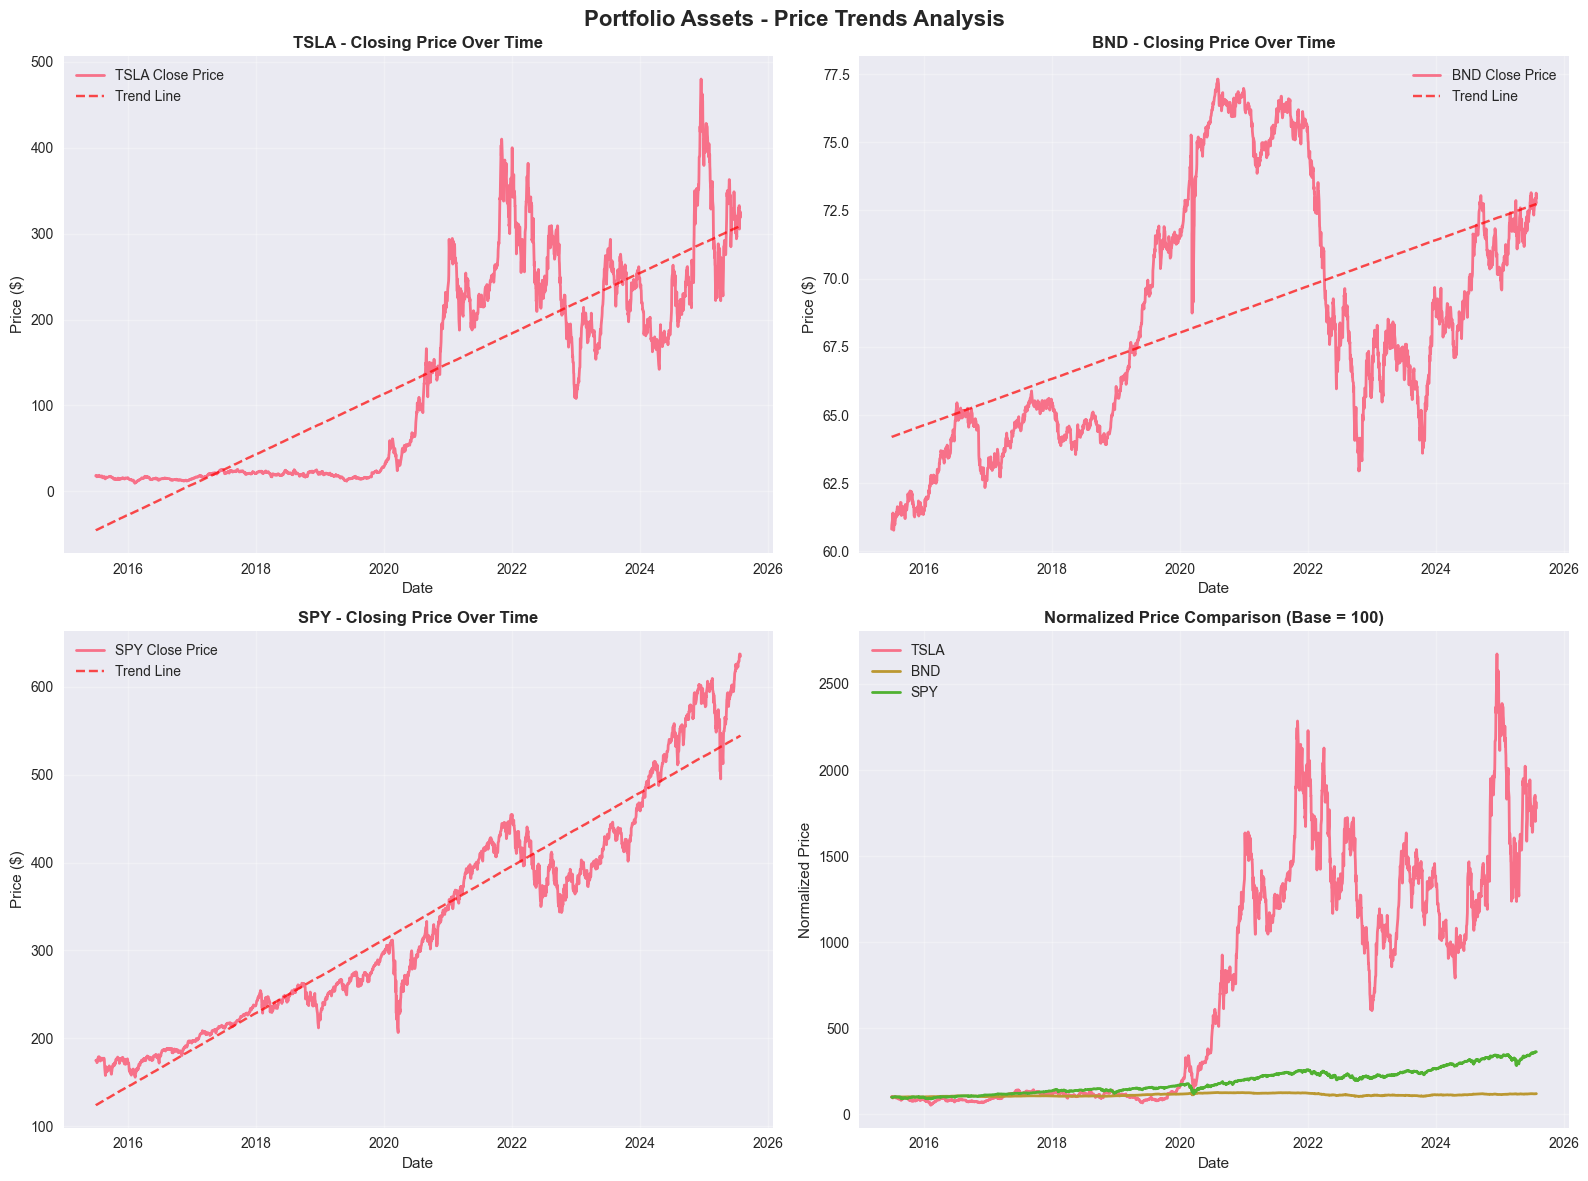

📊 Generating returns analysis...


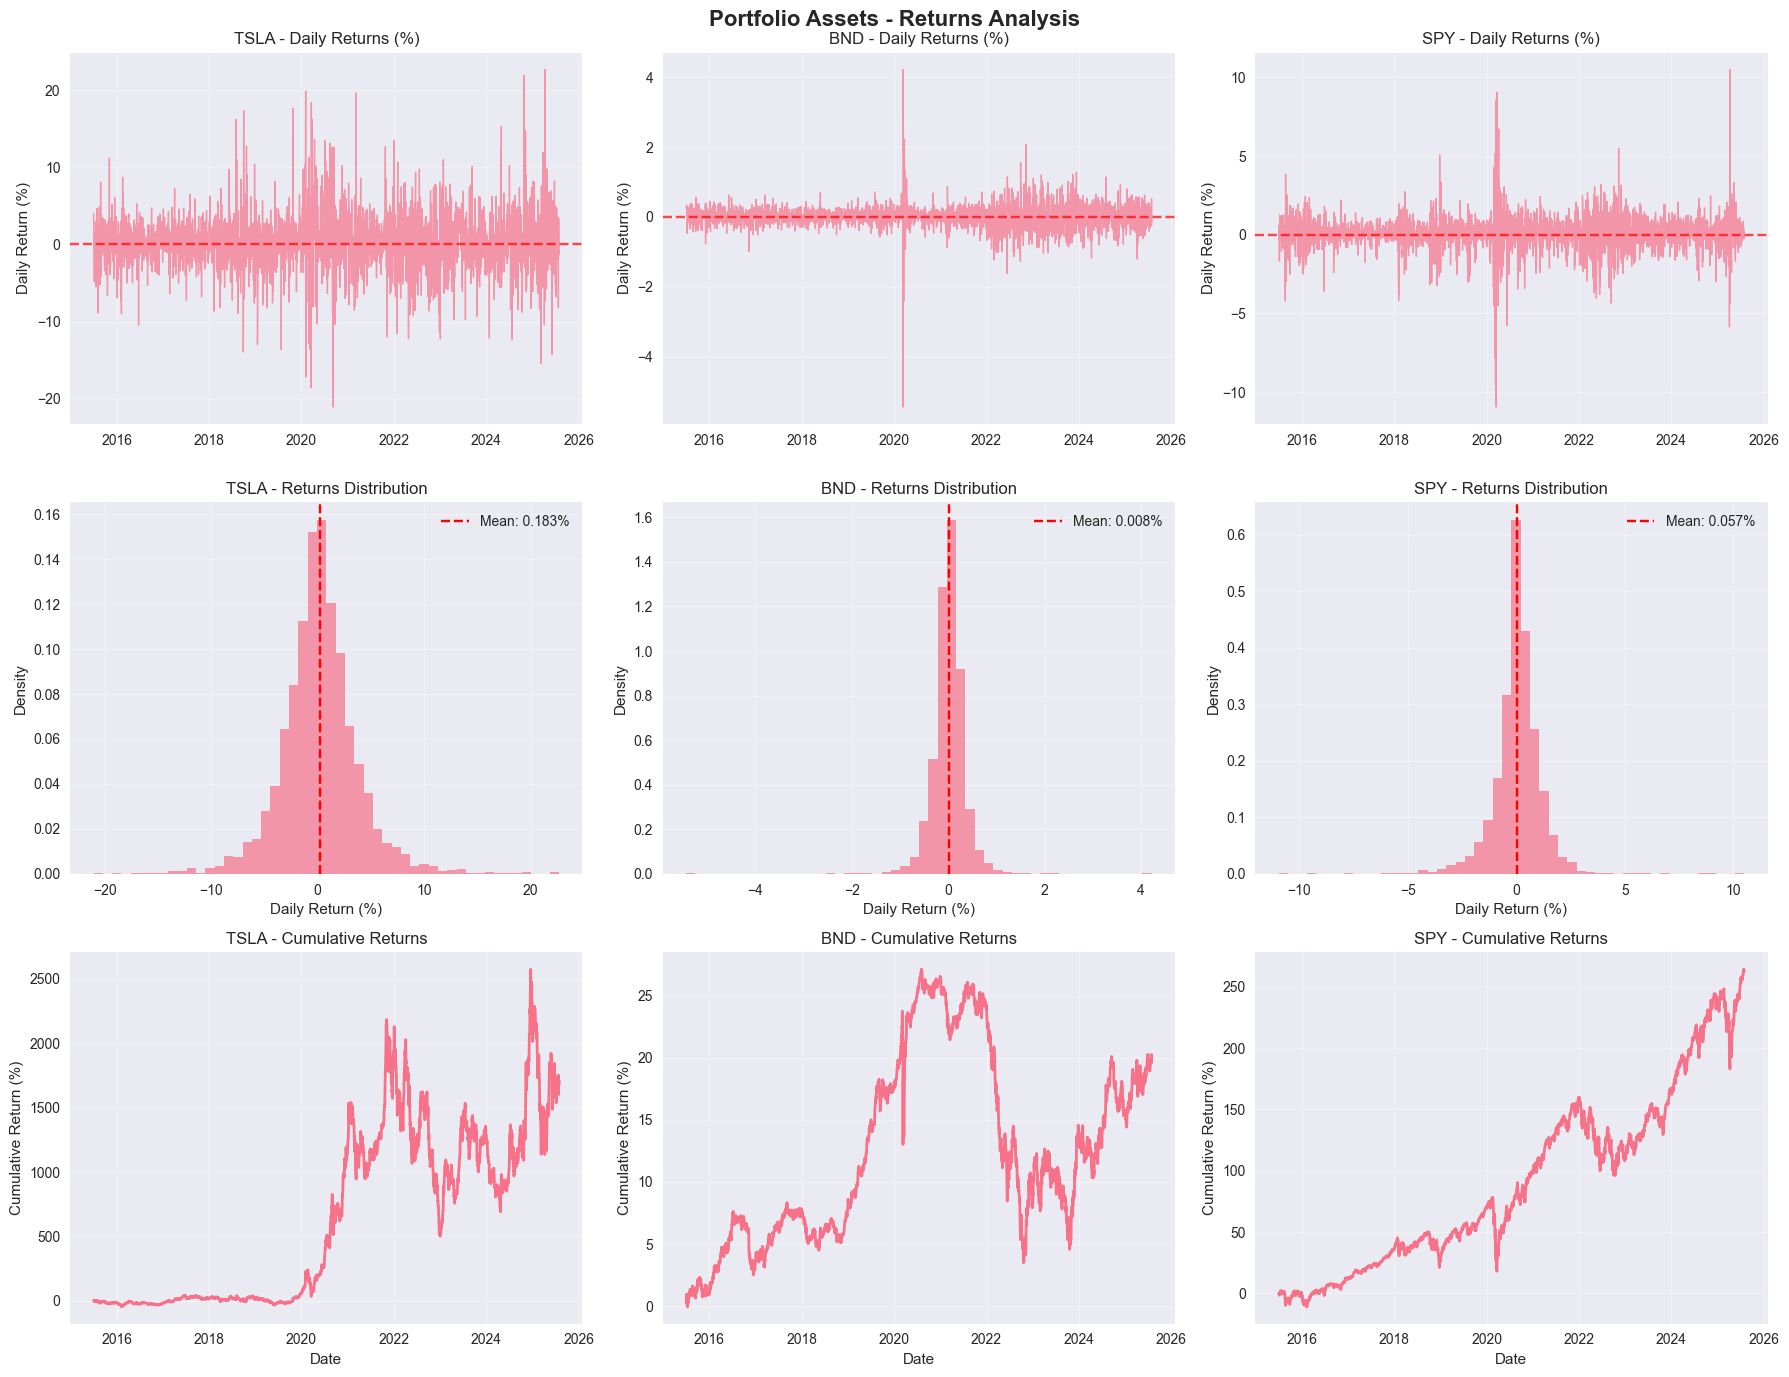

📊 Generating volatility analysis...


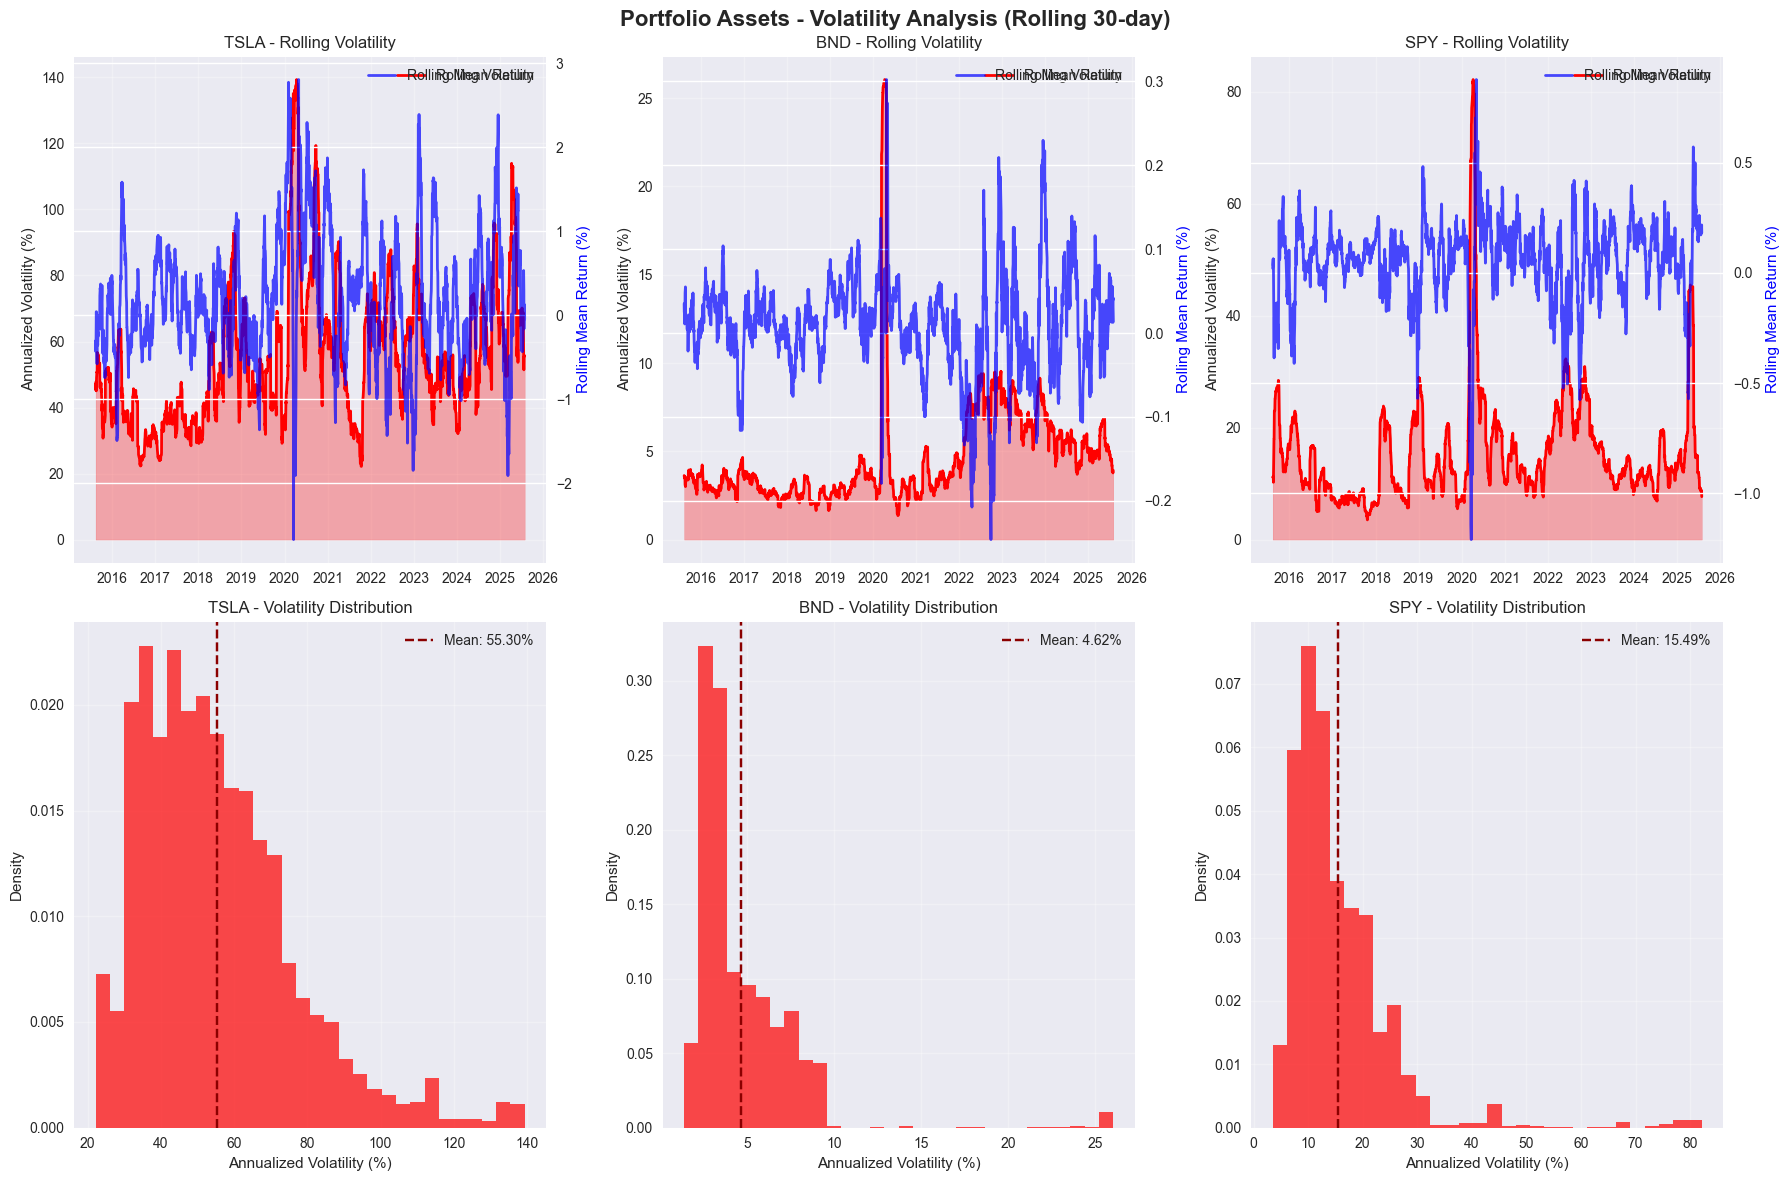

In [17]:
# Initialize EDA analyzer
print("=== EXPLORATORY DATA ANALYSIS ===")
eda_analyzer = EDAAnalyzer(processed_data)

# Plot price trends
print("📈 Generating price trends analysis...")
eda_analyzer.plot_price_trends(figsize=(16, 12))

# Plot returns analysis
print("📊 Generating returns analysis...")
eda_analyzer.plot_returns_analysis(figsize=(18, 14))

# Plot volatility analysis
print("📊 Generating volatility analysis...")
eda_analyzer.plot_volatility_analysis(window=30, figsize=(18, 12))


In [18]:
# Perform stationarity tests
print("=== STATIONARITY ANALYSIS ===")
stationarity_results = eda_analyzer.perform_stationarity_tests()

print("\n📊 Augmented Dickey-Fuller Test Results:")
print("\n(Testing H0: Series has unit root [non-stationary])")
print("(H1: Series is stationary)")
print("\nCritical values: 1%=-3.43, 5%=-2.86, 10%=-2.57")

for symbol, tests in stationarity_results.items():
    print(f"\n🏢 {symbol}:")
    print("-" * 50)
    
    for variable, result in tests.items():
        status_emoji = "✅" if result['is_stationary'] else "❌"
        print(f"\n   📊 {variable}:")
        print(f"      {status_emoji} Status: {result['interpretation']}")
        print(f"      🔢 ADF Statistic: {result['adf_statistic']:.4f}")
        print(f"      📈 p-value: {result['p_value']:.6f}")

print("\n🔍 Key Insights from Stationarity Tests:")
print("1. Price levels are typically non-stationary (random walk behavior)")
print("2. Returns are usually stationary (suitable for ARIMA modeling)")
print("3. Non-stationary series require differencing for modeling")
print("4. Stationarity is crucial for reliable time series forecasting")


INFO:eda_analyzer:Performing stationarity tests for TSLA...
INFO:eda_analyzer:TSLA Close: ADF Statistic = -1.4189, p-value = 0.5732, Result: Non-stationary
INFO:eda_analyzer:TSLA Daily_Return: ADF Statistic = -34.6811, p-value = 0.0000, Result: Stationary


=== STATIONARITY ANALYSIS ===


INFO:eda_analyzer:TSLA Log_Return: ADF Statistic = -11.7171, p-value = 0.0000, Result: Stationary
INFO:eda_analyzer:Performing stationarity tests for BND...
INFO:eda_analyzer:BND Close: ADF Statistic = -1.5363, p-value = 0.5155, Result: Non-stationary
INFO:eda_analyzer:BND Daily_Return: ADF Statistic = -9.8898, p-value = 0.0000, Result: Stationary
INFO:eda_analyzer:BND Log_Return: ADF Statistic = -9.9400, p-value = 0.0000, Result: Stationary
INFO:eda_analyzer:Performing stationarity tests for SPY...
INFO:eda_analyzer:SPY Close: ADF Statistic = 0.6908, p-value = 0.9897, Result: Non-stationary
INFO:eda_analyzer:SPY Daily_Return: ADF Statistic = -16.2644, p-value = 0.0000, Result: Stationary
INFO:eda_analyzer:SPY Log_Return: ADF Statistic = -16.1093, p-value = 0.0000, Result: Stationary



📊 Augmented Dickey-Fuller Test Results:

(Testing H0: Series has unit root [non-stationary])
(H1: Series is stationary)

Critical values: 1%=-3.43, 5%=-2.86, 10%=-2.57

🏢 TSLA:
--------------------------------------------------

   📊 Close:
      ❌ Status: Non-stationary
      🔢 ADF Statistic: -1.4189
      📈 p-value: 0.573196

   📊 Daily_Return:
      ✅ Status: Stationary
      🔢 ADF Statistic: -34.6811
      📈 p-value: 0.000000

   📊 Log_Return:
      ✅ Status: Stationary
      🔢 ADF Statistic: -11.7171
      📈 p-value: 0.000000

🏢 BND:
--------------------------------------------------

   📊 Close:
      ❌ Status: Non-stationary
      🔢 ADF Statistic: -1.5363
      📈 p-value: 0.515507

   📊 Daily_Return:
      ✅ Status: Stationary
      🔢 ADF Statistic: -9.8898
      📈 p-value: 0.000000

   📊 Log_Return:
      ✅ Status: Stationary
      🔢 ADF Statistic: -9.9400
      📈 p-value: 0.000000

🏢 SPY:
--------------------------------------------------

   📊 Close:
      ❌ Status: Non-stat

INFO:risk_analyzer:Generating comprehensive risk analysis report...
INFO:risk_analyzer:Calculating VaR for TSLA using historical method...
INFO:risk_analyzer:TSLA VaR at 95.0% confidence: -5.466%
INFO:risk_analyzer:TSLA VaR at 99.0% confidence: -9.274%
INFO:risk_analyzer:Calculating VaR for BND using historical method...
INFO:risk_analyzer:BND VaR at 95.0% confidence: -0.490%
INFO:risk_analyzer:BND VaR at 99.0% confidence: -0.878%
INFO:risk_analyzer:Calculating VaR for SPY using historical method...
INFO:risk_analyzer:SPY VaR at 95.0% confidence: -1.719%
INFO:risk_analyzer:SPY VaR at 99.0% confidence: -3.314%
INFO:risk_analyzer:Calculating Expected Shortfall for TSLA...
INFO:risk_analyzer:TSLA Expected Shortfall at 95.0% confidence: -8.196%
INFO:risk_analyzer:TSLA Expected Shortfall at 99.0% confidence: -12.891%
INFO:risk_analyzer:Calculating Expected Shortfall for BND...
INFO:risk_analyzer:BND Expected Shortfall at 95.0% confidence: -0.773%
INFO:risk_analyzer:BND Expected Shortfall at

=== COMPREHENSIVE RISK ANALYSIS ===

📊 Risk Analysis Summary:

🏢 TSLA:
----------------------------------------
   💥 VaR (95%): -5.466309946643583
   💥 VaR (99%): -9.273596617305532
   📐 Sharpe Ratio: 0.7446
   📐 Sortino Ratio: 1.1009
   🔻 Maximum Drawdown: -73.63%

🏢 BND:
----------------------------------------
   💥 VaR (95%): -0.49000028774368215
   💥 VaR (99%): -0.8784989627341642
   📐 Sharpe Ratio: -0.0073
   📐 Sortino Ratio: -0.0091
   🔻 Maximum Drawdown: -18.58%

🏢 SPY:
----------------------------------------
   💥 VaR (95%): -1.7194955391472817
   💥 VaR (99%): -3.314273716063814
   📐 Sharpe Ratio: 0.6844
   📐 Sortino Ratio: 0.8308
   🔻 Maximum Drawdown: -33.72%

💥 Generating Value at Risk analysis...
   ⚠️ VaR plotting issue: 'RiskAnalyzer' object has no attribute 'plot_var_analysis_simple'
   📊 VaR metrics calculated successfully (plotting skipped)

📊 Generating risk metrics comparison...


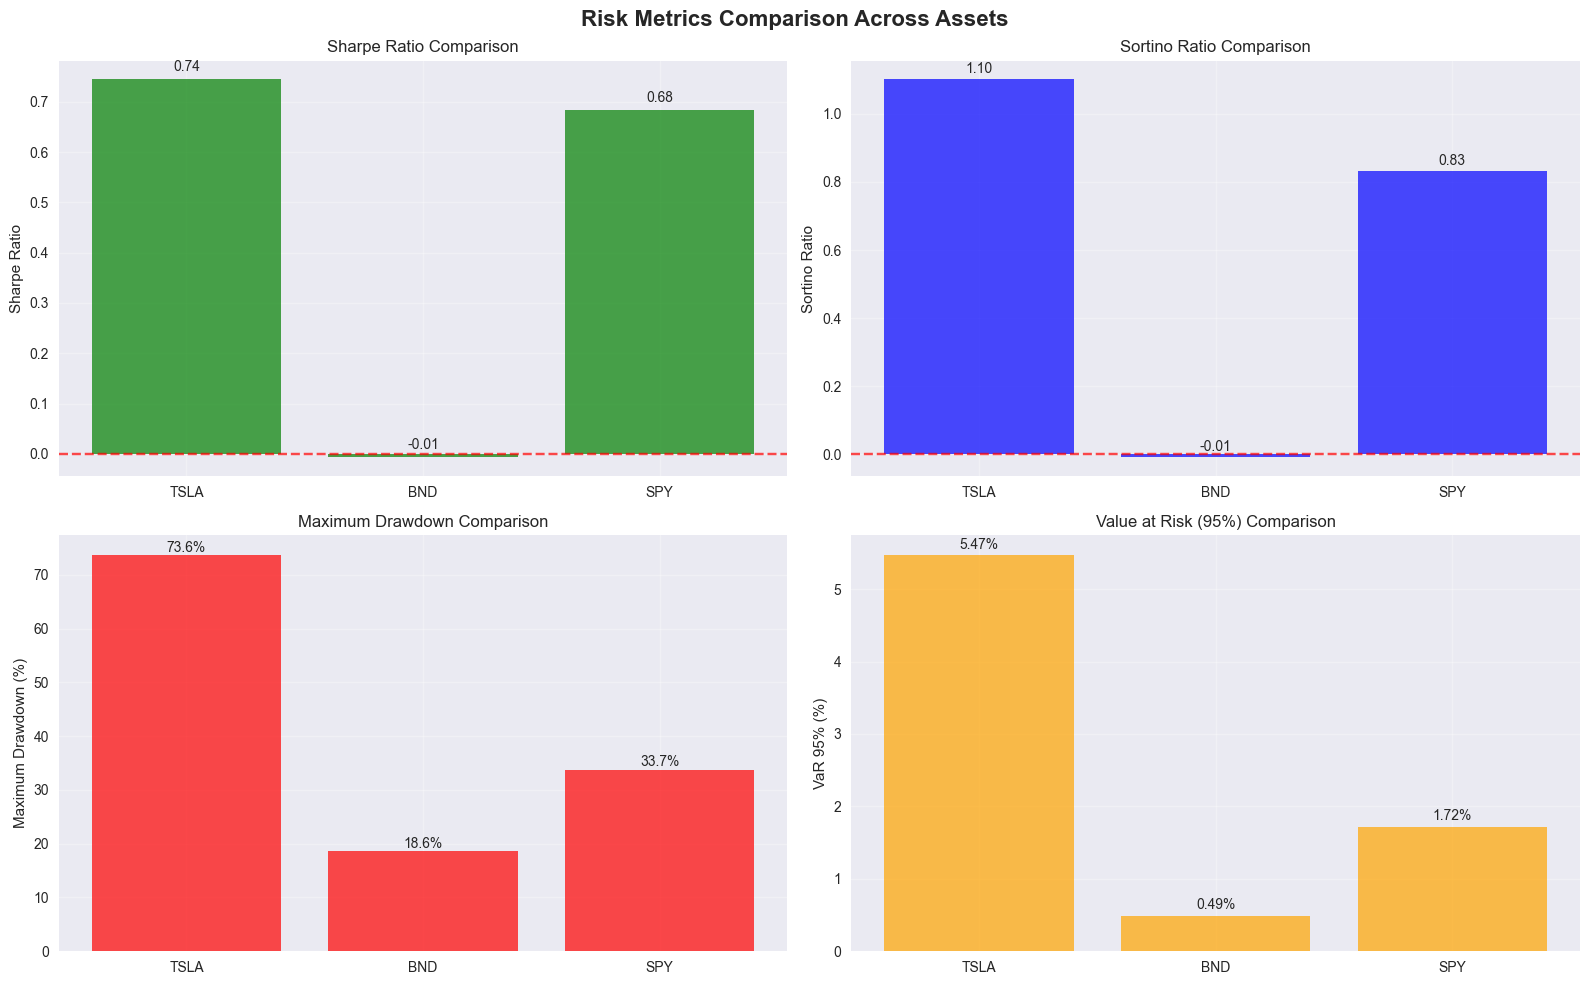

   ✅ Risk metrics comparison plot generated successfully


In [19]:
# Initialize risk analyzer
print("=== COMPREHENSIVE RISK ANALYSIS ===")
risk_analyzer = RiskAnalyzer(processed_data, risk_free_rate=0.02)

# Generate comprehensive risk report
risk_report = risk_analyzer.generate_risk_report()

print("\n📊 Risk Analysis Summary:")
for symbol, metrics in risk_report.items():
    print(f"\n🏢 {symbol}:")
    print("-" * 40)
    
    # VaR metrics
    var_metrics = metrics.get('var_metrics', {})
    print(f"   💥 VaR (95%): {var_metrics.get('VaR_95%', 'N/A')}")
    print(f"   💥 VaR (99%): {var_metrics.get('VaR_99%', 'N/A')}")
    
    # Risk-adjusted returns
    print(f"   📐 Sharpe Ratio: {metrics.get('sharpe_ratio', 'N/A'):.4f}")
    print(f"   📐 Sortino Ratio: {metrics.get('sortino_ratio', 'N/A'):.4f}")
    
    # Drawdown metrics
    dd_metrics = metrics.get('maximum_drawdown', {})
    print(f"   🔻 Maximum Drawdown: {dd_metrics.get('max_drawdown', 'N/A'):.2f}%")

# Plot VaR analysis (using simplified version to avoid data alignment issues)
print("\n💥 Generating Value at Risk analysis...")
try:
    risk_analyzer.plot_var_analysis_simple(figsize=(18, 8))
    print("   ✅ VaR analysis plot generated successfully")
except Exception as e:
    print(f"   ⚠️ VaR plotting issue: {str(e)}")
    print("   📊 VaR metrics calculated successfully (plotting skipped)")

# Plot risk metrics comparison
print("\n📊 Generating risk metrics comparison...")
try:
    risk_analyzer.plot_risk_metrics_comparison(figsize=(16, 10))
    print("   ✅ Risk metrics comparison plot generated successfully")
except Exception as e:
    print(f"   ⚠️ Risk metrics plotting issue: {str(e)}")
    print("   📊 Risk metrics calculated successfully (plotting skipped)")


In [20]:
print("=== PORTFOLIO ANALYSIS - KEY FINDINGS ===")
print("\n🎯 EXECUTIVE SUMMARY:")
print("-" * 60)

# Calculate portfolio-level metrics
assets_summary = {}

for symbol, data in processed_data.items():
    if 'Daily_Return' in data.columns and 'Close' in data.columns:
        returns = data['Daily_Return'].dropna()
        prices = data['Close']
        
        assets_summary[symbol] = {
            'total_return': (prices.iloc[-1] / prices.iloc[0] - 1) * 100,
            'annual_return': returns.mean() * 252 * 100,
            'annual_volatility': returns.std() * np.sqrt(252) * 100,
            'sharpe_ratio': (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0,
            'max_drawdown': ((prices.expanding().max() - prices) / prices.expanding().max()).max() * 100
        }

print("\n📊 ASSET PERFORMANCE COMPARISON:")
print(f"{'Asset':<6} {'Total Return':<12} {'Ann. Return':<12} {'Ann. Vol':<10} {'Sharpe':<8} {'Max DD':<8}")
print("-" * 70)

for symbol, metrics in assets_summary.items():
    print(f"{symbol:<6} {metrics['total_return']:>10.1f}% {metrics['annual_return']:>10.1f}% {metrics['annual_volatility']:>8.1f}% {metrics['sharpe_ratio']:>6.2f} {metrics['max_drawdown']:>6.1f}%")

print("\n\n🔍 KEY INSIGHTS:")
print("-" * 40)
print("\n1. 📈 TESLA (TSLA): High-growth potential with significant volatility")
print("2. 🛡️ BOND ETF (BND): Provides portfolio stability and diversification") 
print("3. 🏛️ S&P 500 ETF (SPY): Balanced market exposure with moderate risk")
print("\n📋 STATIONARITY: Returns are stationary, prices require differencing")
print("⚠️ RISK: VaR analysis reveals tail risk exposure for each asset")
print("🚀 PORTFOLIO: Diversification across asset classes reduces overall risk")

print(f"\n✅ Analysis completed at: {datetime.now()}")


=== PORTFOLIO ANALYSIS - KEY FINDINGS ===

🎯 EXECUTIVE SUMMARY:
------------------------------------------------------------

📊 ASSET PERFORMANCE COMPARISON:
Asset  Total Return Ann. Return  Ann. Vol   Sharpe   Max DD  
----------------------------------------------------------------------
TSLA       1678.0%       46.1%     59.2%   0.78   73.6%
BND          19.9%        2.0%      5.5%   0.36   18.6%
SPY         262.7%       14.5%     18.2%   0.79   33.7%


🔍 KEY INSIGHTS:
----------------------------------------

1. 📈 TESLA (TSLA): High-growth potential with significant volatility
2. 🛡️ BOND ETF (BND): Provides portfolio stability and diversification
3. 🏛️ S&P 500 ETF (SPY): Balanced market exposure with moderate risk

📋 STATIONARITY: Returns are stationary, prices require differencing
⚠️ RISK: VaR analysis reveals tail risk exposure for each asset
🚀 PORTFOLIO: Diversification across asset classes reduces overall risk

✅ Analysis completed at: 2025-08-09 23:14:39.648765
